## Sports Analytics

Data Driven frameworks should drive decisions in the field, court or pitches in the same way they influence decisions in the boardroom. And many sports enthusiasts are showing the power of analytics in sports science, from IBMs involvement in facilitating F1 teams to analysis of track injuries data for improving participants’ safety, the gains cannot be overstated.

Individuals who think critically and understand complex problems through data exploration do bring a unique perspective to the investigation of player movements and interactions in sports

In this project you will explore the tour de france data.

The Tour de France is an annual men's multiple stage bicycle race primarily held in France, while also occasionally passing through nearby countries. Like the other Grand Tours (the Giro d'Italia and the Vuelta a España), it consists of 21 day-long stages over the course of 23 days. It has been described as "the world’s most prestigious and most difficult bicycle race".

You will explore the following with the supplied data

1.The winning time and how far the runner up is, i.e. how long did it take to win, with every edition. So in a sense checking, are there cyclist getting better bikes, or are they getting lazier
2.A box plot of the winners per stage type and comment sth. Use this image as inspiration
3.What relationship is there between a winners age and the number of stages led.
4.Sort by the most recent winning and find the winner's nationality and display the top. Use this image as inspiration


It is important to note that poor communication creates confusion and potentially even doubt in the minds of business leaders who are tasked with decision-making and as such I urge you to be as expressive as possible in presenting your insights.

In [4]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#import data

sports = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')
sports.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [6]:
sports.isnull().sum()

edition           0
start_date        0
winner_name       0
winner_team       0
distance          0
time_overall      8
time_margin       8
stage_wins        0
stages_led        0
height           40
weight           39
age               0
born              0
died             50
full_name        60
nickname         32
birth_town        0
birth_country     0
nationality       0
dtype: int64

In [7]:
sports.shape

(106, 19)

In [8]:
clean_sports = sports.dropna()
clean_sports.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
35,36,1949-06-30,Fausto Coppi,Italy,4808.0,149.680278,0.169444,3,5,1.77,68.0,29,1919-09-15,1960-01-02,Angelo Fausto Coppi,"The Heron,Il Campionissimo\n(Champion of Champ...",Castellania,Italy,Italy
38,39,1952-06-25,Fausto Coppi,Italy,4898.0,151.955556,0.474444,5,14,1.77,68.0,30,1919-09-15,1960-01-02,Angelo Fausto Coppi,"The Heron,Il Campionissimo\n(Champion of Champ...",Castellania,Italy,Italy
69,70,1983-07-01,Laurent Fignon,Renault–Elf,3809.0,105.131111,0.067778,1,6,1.74,67.0,22,1960-08-12,2010-08-31,Laurent Patrick Fignon,Le Professeur (The Professor),Paris,France,France
70,71,1984-06-29,Laurent Fignon,Renault–Elf,4021.0,112.061111,0.169444,5,7,1.74,67.0,23,1960-08-12,2010-08-31,Laurent Patrick Fignon,Le Professeur (The Professor),Paris,France,France


In [9]:
sports = sports.set_index('edition')
sports.head()

,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
edition,,,,,,,,,,,,,,,,,,
1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [10]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 1 to 106
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   start_date     106 non-null    object 
 1   winner_name    106 non-null    object 
 2   winner_team    106 non-null    object 
 3   distance       106 non-null    float64
 4   time_overall   98 non-null     float64
 5   time_margin    98 non-null     float64
 6   stage_wins     106 non-null    int64  
 7   stages_led     106 non-null    int64  
 8   height         66 non-null     float64
 9   weight         67 non-null     float64
 10  age            106 non-null    int64  
 11  born           106 non-null    object 
 12  died           56 non-null     object 
 13  full_name      46 non-null     object 
 14  nickname       74 non-null     object 
 15  birth_town     106 non-null    object 
 16  birth_country  106 non-null    object 
 17  nationality    106 non-null    object 
dtypes: float64(5), 

In [11]:
sports.describe()

,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age
count,106.000000,98.000000,98.000000,106.000000,106.000000,66.000000,67.000000,106.000000
mean,4212.064151,125.754983,0.267727,2.735849,10.792453,1.778788,69.253731,27.716981
std,704.284160,41.559391,0.476194,1.842885,5.307169,0.056989,6.592795,3.354470
min,2428.000000,82.086667,0.002222,0.000000,1.000000,1.610000,52.000000,19.000000
25%,3657.875000,92.601597,0.050833,1.000000,6.250000,1.740000,64.500000,26.000000
50%,4155.500000,115.026806,0.101667,2.000000,12.000000,1.770000,69.000000,28.000000
75%,4652.500000,142.678472,0.249931,4.000000,14.000000,1.820000,74.000000,30.000000
max,5745.000000,238.740278,2.989167,8.000000,22.000000,1.900000,88.000000,36.000000


In [12]:
sports.head()

,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
edition,,,,,,,,,,,,,,,,,,
1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [13]:
sc = sports.dropna(subset=['time_overall','time_margin'])
sc.head()

,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
edition,,,,,,,,,,,,,,,,,,
1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
11,1913-06-29,Philippe Thys,Peugeot–Wolber,5287.0,197.900000,0.135556,1,8,NaN,NaN,23,1889-10-08,1971-01-16,NaN,Le basset (The Basset Hound),Anderlecht,Belgium,Belgium
12,1914-06-28,Philippe Thys,Peugeot–Wolber,5380.0,200.480000,0.016944,1,15,NaN,NaN,24,1889-10-08,1971-01-16,NaN,Le basset (The Basset Hound),Anderlecht,Belgium,Belgium
13,1919-06-29,Firmin Lambot,La Sportive,5560.0,231.120833,1.715000,1,2,NaN,NaN,33,1886-03-14,1964-01-19,NaN,NaN,Florennes,Belgium,Belgium


In [14]:
clean = pd.notnull(sports[['time_overall','time_margin']])
sports[clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 1 to 106
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   start_date     0 non-null      object 
 1   winner_name    0 non-null      object 
 2   winner_team    0 non-null      object 
 3   distance       0 non-null      float64
 4   time_overall   98 non-null     float64
 5   time_margin    98 non-null     float64
 6   stage_wins     0 non-null      float64
 7   stages_led     0 non-null      float64
 8   height         0 non-null      float64
 9   weight         0 non-null      float64
 10  age            0 non-null      float64
 11  born           0 non-null      object 
 12  died           0 non-null      object 
 13  full_name      0 non-null      object 
 14  nickname       0 non-null      object 
 15  birth_town     0 non-null      object 
 16  birth_country  0 non-null      object 
 17  nationality    0 non-null      object 
dtypes: float64(8), 

C:\Users\Kathleen\AppData\Local\Temp\ipykernel_14216\1282509196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc['time_margin'] = pd.to_timedelta(sc['time_margin'])
C:\Users\Kathleen\AppData\Local\Temp\ipykernel_14216\1282509196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc['time_overall'] = pd.to_timedelta(sc['time_overall'])
C:\Users\Kathleen\AppData\Local\Temp\ipykernel_14216\1282509196.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

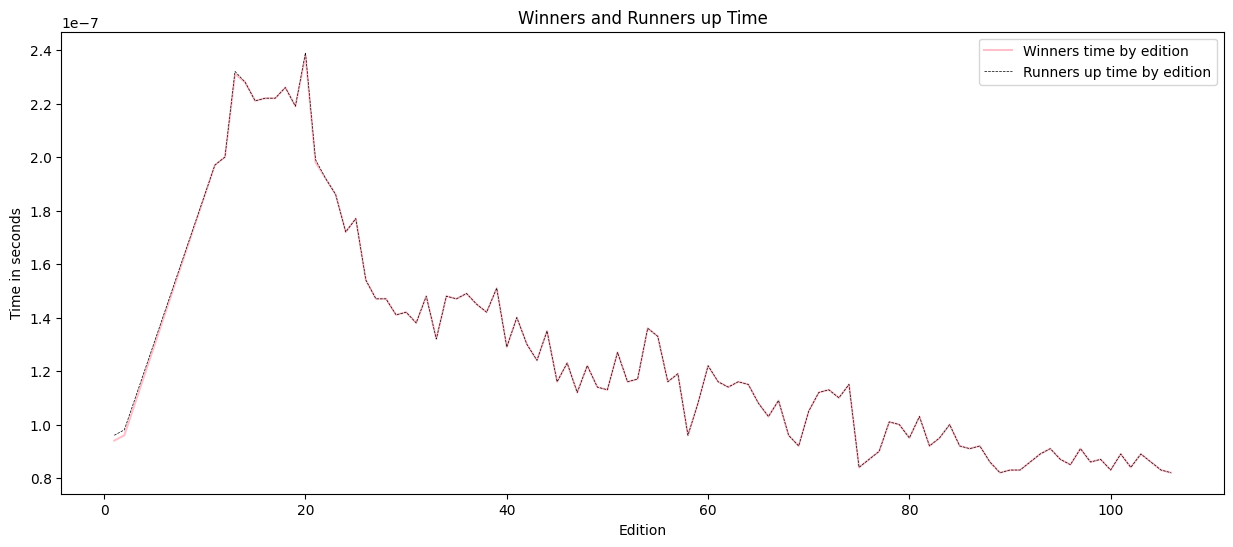

In [24]:
#1.The winning time and how far the runner up is, i.e. how long did it take to win, with every edition. 
# So in a sense checking, are there cyclist getting better bikes, or are they getting lazier

sc['time_margin'] = pd.to_timedelta(sc['time_margin'])
sc['time_overall'] = pd.to_timedelta(sc['time_overall'])

sc['runners_up_time'] = sc['time_overall'] + sc['time_margin']

plt.figure(figsize=(15,6))

x = sc.index
y1 = sc['time_overall'].dt.total_seconds()
y2 = sc['runners_up_time'].dt.total_seconds()

plt.plot(x,y1,label='Winners time by edition',color='pink',linewidth=1.5)
plt.plot(x,y2,label = 'Runners up time by edition',color= 'black',linestyle='--',linewidth=0.5)
plt.title('Winners and Runners up Time')
plt.xlabel('Edition')
plt.ylabel('Time in seconds')
plt.legend()

plt.show()




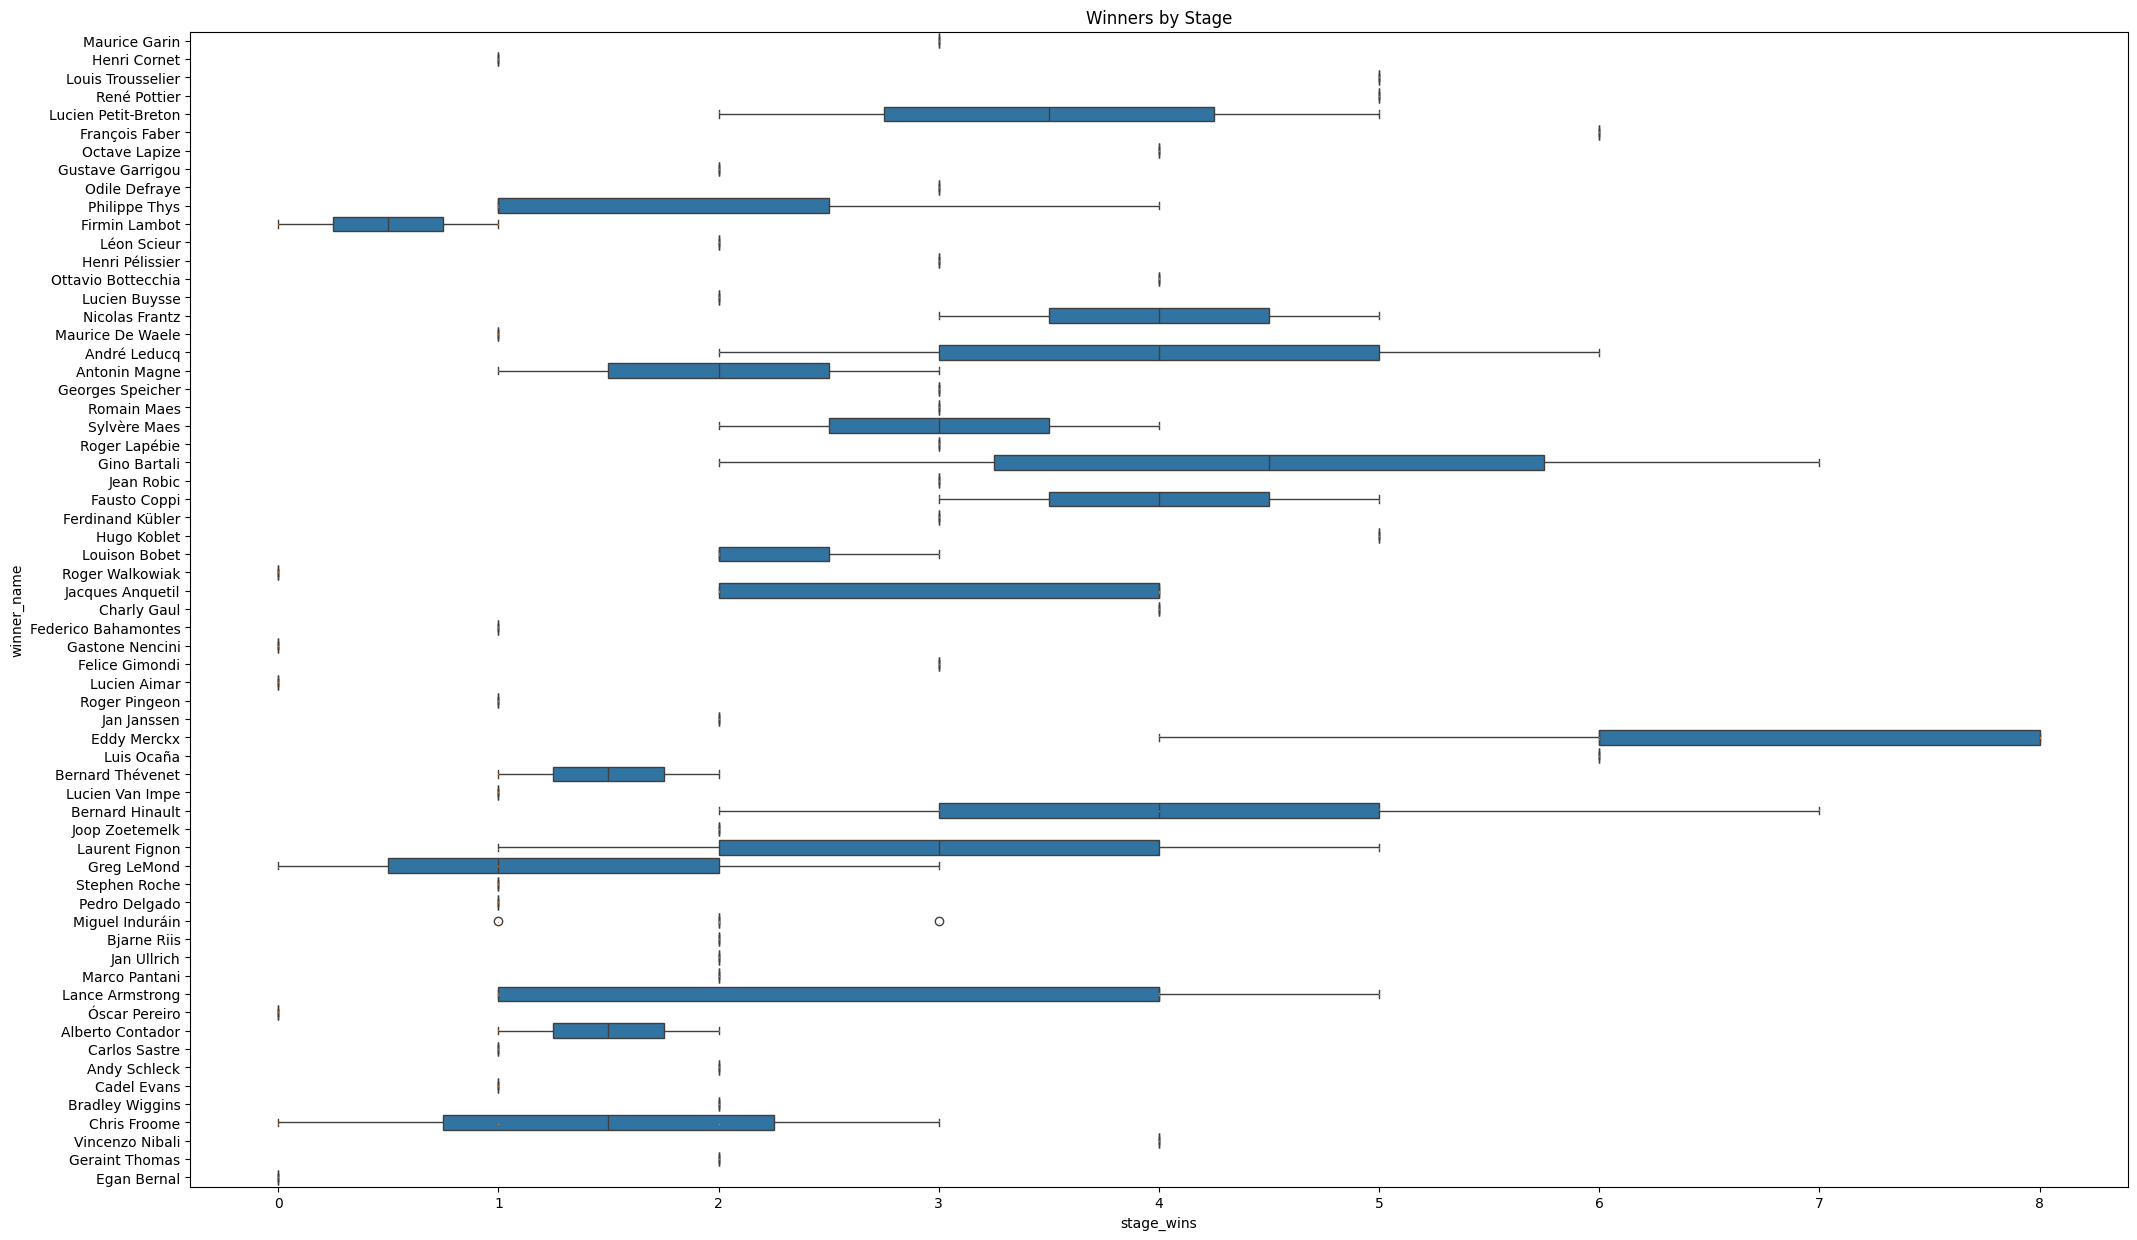

In [16]:
#2.A box plot of the winners per stage type and comment sth. Use this image as inspiration

plt.figure(figsize=(25,15))
sns.boxplot(data=sports,x='stage_wins',y='winner_name')
sns.stripplot(data=sports,x='stage_wins',y='winner_name',size=1.0,alpha=0.8)
plt.title('Winners by Stage')
plt.show()

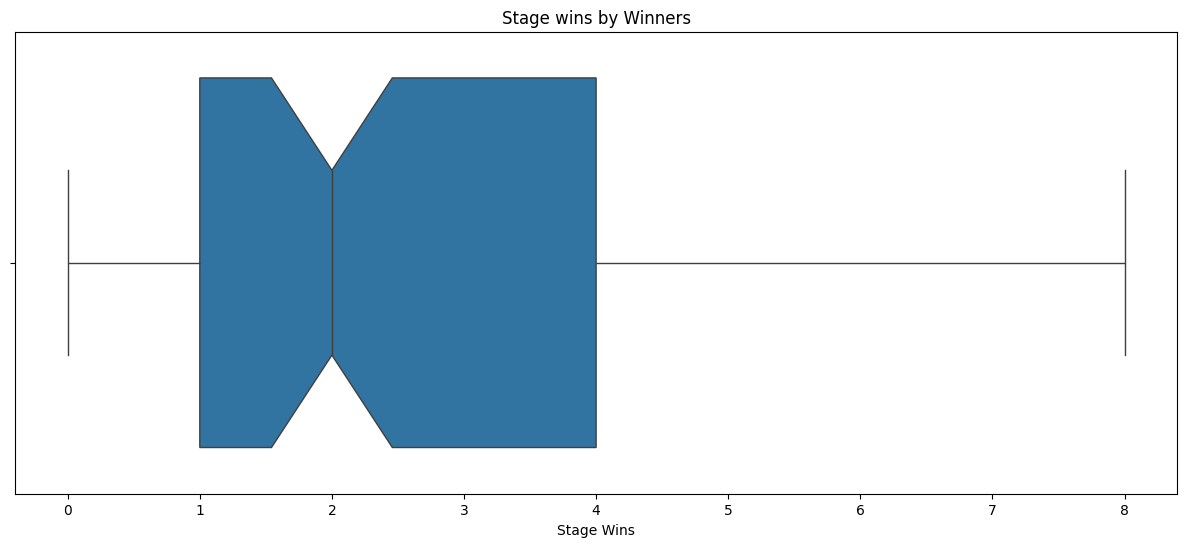

In [29]:
fig,ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(sports['stage_wins'],orient='h',notch='True')
ax.set_xlabel('Stage Wins')
ax.set_title('Stage wins by Winners')
plt.show()

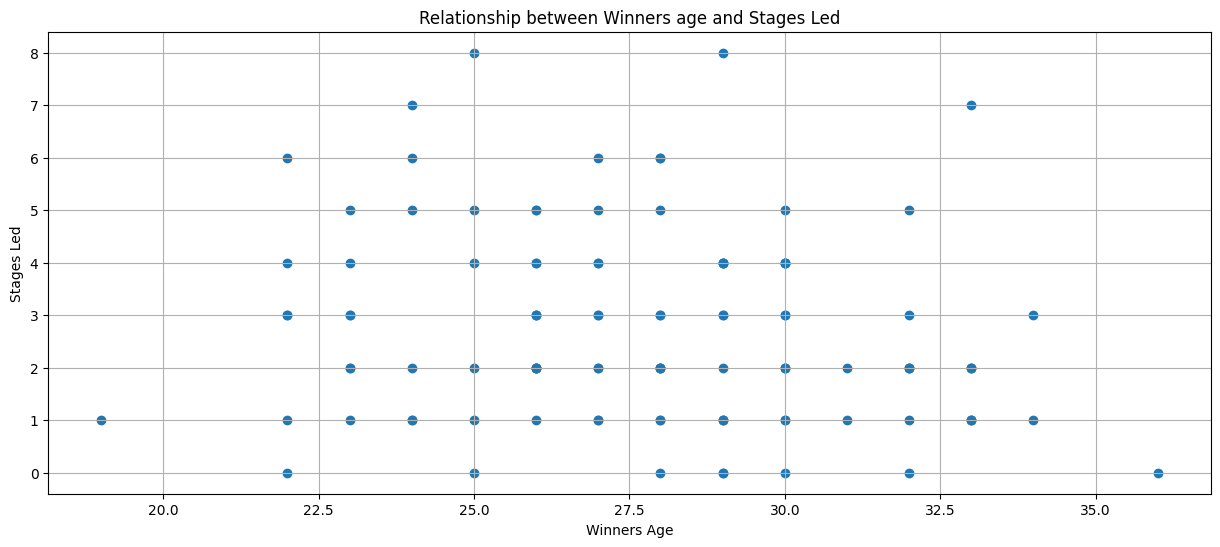

In [17]:
#3.What relationship is there between a winners age and the number of stages led.

plt.figure(figsize=(15,6))
plt.scatter(x=sports['age'],y=sports['stage_wins'],alpha=1.0)
plt.title('Relationship between Winners age and Stages Led')
plt.xlabel('Winners Age')
plt.ylabel('Stages Led')
plt.grid(True)
plt.show()



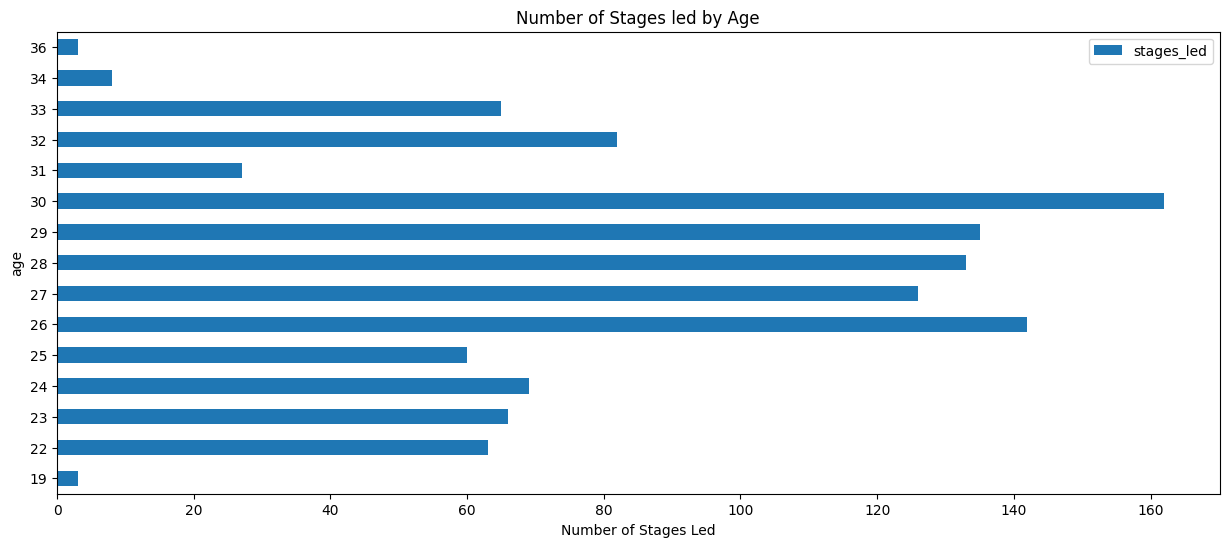

In [25]:
#Using Barplots

ax = sports.groupby('age')[['stages_led']].sum().plot(kind='barh',figsize=(15,6),title='Number of Stages led by Age')
ax.set_xlabel('Number of Stages Led')
plt.show()

In [19]:
sports['start_date'] = pd.to_datetime(sports['start_date'])

sports['year'] = sports['start_date'].dt.year

In [20]:
sports.head()

,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,year
edition,,,,,,,,,,,,,,,,,,,
1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France,1903
2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France,1904
3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France,1905
4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France,1906
5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France,1907


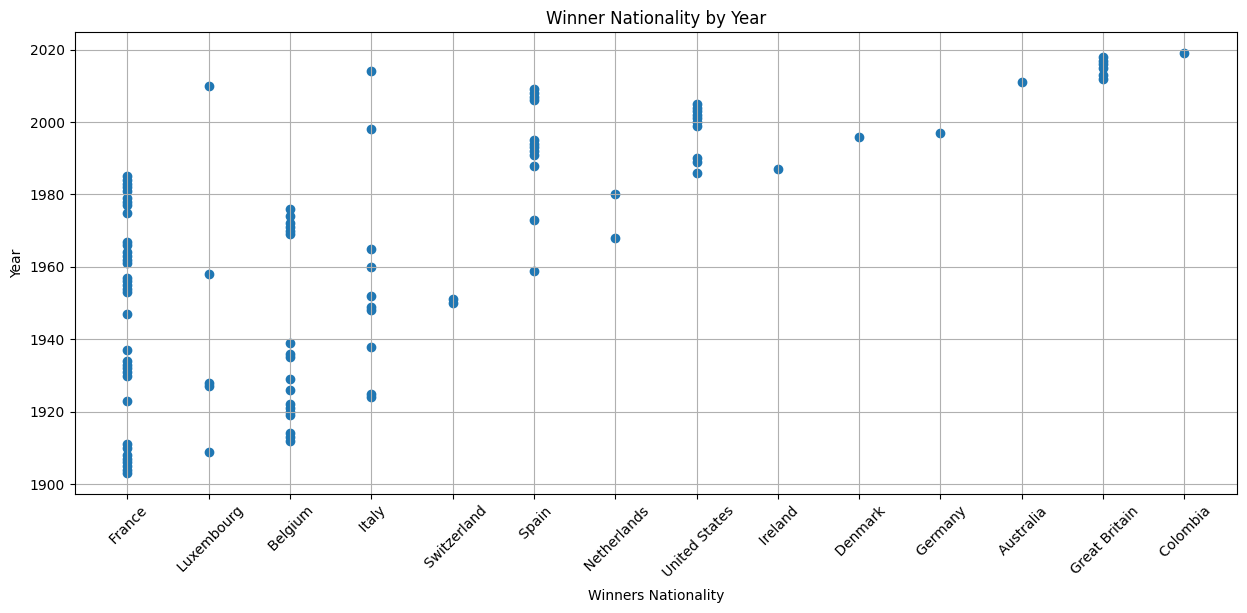

In [21]:
#4.Sort by the most recent winning and find the winner's nationality and display the top. Use this image as inspiration

plt.figure(figsize=(15,6))
plt.scatter(x=sports['nationality'],y=sports['year'])
plt.title('Winner Nationality by Year')
plt.xlabel('Winners Nationality')
plt.ylabel('Year')
plt.tick_params(axis='x',labelrotation = 45)
plt.grid(True)
plt.show()